<h1>2. Zeitreihen und ihre Merkmale visualisieren</h1>
<h4>Session 2 (Donnerstag 11:00 – 12:30)</h4>
<br>
2.1 Zeitreihen plotten, Plots anpassen <br>
2.2 Gleitende Mittel berechnen und visualisieren, Autokorrelation, partielle Autokorrelation plotten<br>
2.3 Komponenten von Zeitreihen (Trend, Saisonalität) berechnen und visualisieren

<h2>2.1 Zeitreihen plotten, Plots anpassen</h2>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

<h3> Datensatz einlesen</h3>

In [25]:
ene = pd.read_csv("ene.csv")
ene['Datum'] = pd.to_datetime(ene['Datum'])
ene.set_index('Datum', inplace=True)
ene.head()

,Fossile,Wind,Solar
Datum,,,
2016-01-01,37521,9771,702
2016-02-01,32023,10371,1350
2016-03-01,35256,6331,2591
2016-04-01,30078,6235,4129
2016-05-01,27404,6445,5190


<h3> Daten visualisieren </h3>

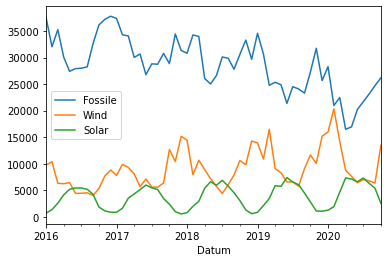

In [27]:
ene.plot();

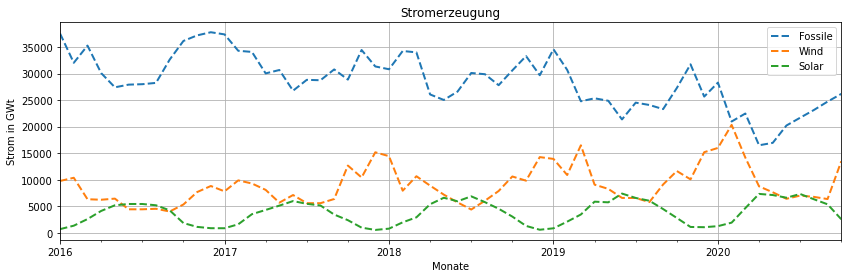

In [28]:
ene.plot(figsize=(14, 4), linewidth=2.0, linestyle='--')
plt.xlabel('Monate')
plt.ylabel('Strom in GWt')
plt.title('Stromerzeugung')
plt.grid(True)

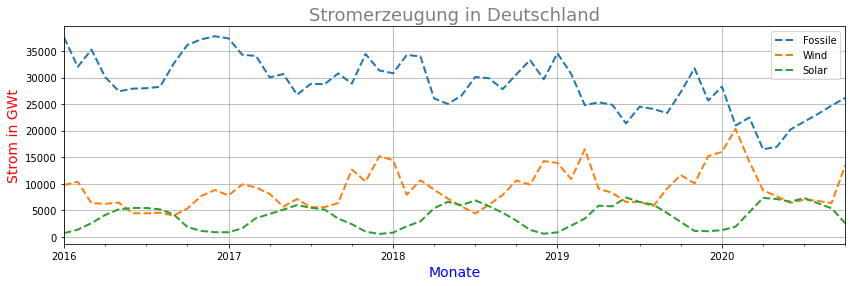

In [29]:
ene.plot(figsize=(14, 4), linewidth=2.0, linestyle='--')
x = plt.xlabel('Monate', fontsize=14, color='blue')
y = plt.ylabel('Strom in GWt', fontsize=14, color='red')
t = plt.title('Stromerzeugung in Deutschland', fontsize=18, color='grey')
plt.grid(True)

<h3>Plotly Express</h3>

In [31]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'])

In [32]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], title='Stromerzeugung in Deutschland nach Energieträger', labels=dict(Datum="Monatliche Daten", value="Stromerzeugung in Mio. kWh", variable="Energieträger"))

In [33]:
fig = px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], title='Stromerzeugung in Deutschland nach Energieträger', labels=dict(Datum="Monatliche Daten", value="Stromerzeugung in Mio. kWh", variable="Energieträger"))
fig.update_layout(legend=dict(yanchor="top", y=0.95, xanchor="left", x=0.87))
fig.show()

<div class="alert alert-info">
- Öffne dir ein neues Notebook<br>
- Lade die Airlinedaten (Achtung - vorher natürlich Pakete laden)<br>
- Plotte die Daten zunächst mit '.plot' und passe den Plot an, dass der Leser ihn versteht<br>
- Plotte die Daten danach mit Plotly Express und passe den Plot auch entsprechend an<br>
- Wenn du extra Zeit hast, schau online nach der Plotly Express Dokumentation und probiere eine weitere Formatierungsoption daraus aus
</div>

<h2>2.2 Gleitende Mittel berechnen und visualisieren, Autokorrelation, partielle Autokorrelation plotten</h2>

<h3>Gleitende Mittel</h3>

In [34]:
emjahr = pd.read_csv("em_HH4_2012.csv", index_col=0)
emjahr['Zeit'] = pd.to_datetime(emjahr['Zeit'])
emjahr.set_index('Zeit', inplace=True)
emjahr.head()

,Strom
Zeit,
2012-01-01 00:00:00,840.0
2012-01-01 01:00:00,1102.0
2012-01-01 02:00:00,1025.0
2012-01-01 03:00:00,833.0
2012-01-01 04:00:00,733.0


<AxesSubplot:xlabel='Zeit'>

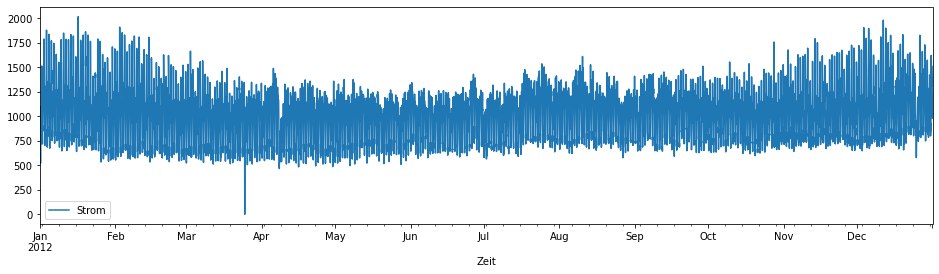

In [35]:
emjahr.plot(figsize=(16, 4))

In [36]:
rol = emjahr.rolling(24).mean()
rol

,Strom
Zeit,
2012-01-01 00:00:00,NaN
2012-01-01 01:00:00,NaN
2012-01-01 02:00:00,NaN
2012-01-01 03:00:00,NaN
2012-01-01 04:00:00,NaN
...,...
2012-12-31 19:00:00,1207.416667
2012-12-31 20:00:00,1198.166667
2012-12-31 21:00:00,1185.791667


<AxesSubplot:xlabel='Zeit'>

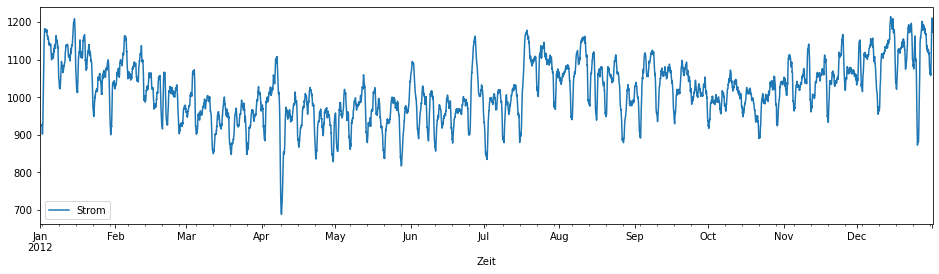

In [37]:
rol = emjahr.rolling(24).mean()
rol.plot(figsize=(16, 4))

<AxesSubplot:xlabel='Zeit'>

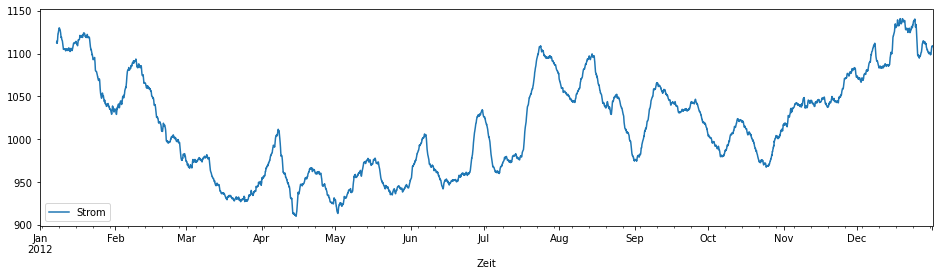

In [38]:
rol = emjahr.rolling(168).mean()
rol.plot(figsize=(16, 4))

<AxesSubplot:xlabel='Zeit'>

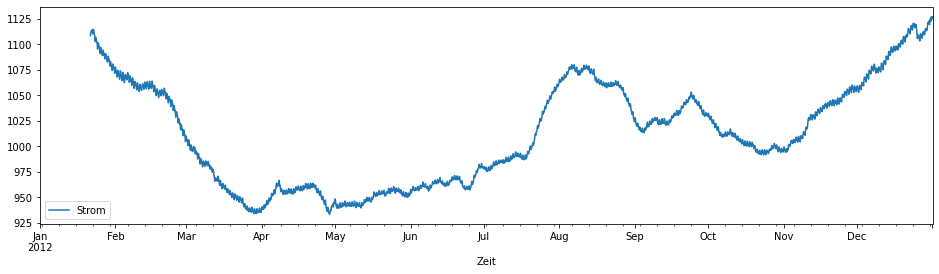

In [39]:
rol = emjahr.rolling(500).mean()
rol.plot(figsize=(16, 4))

<div class="alert alert-info">
- Öffne dir ein neues Notebook<br>
- Lade die Stromverbrauchsdaten von Haushalt 8 im Mai<br>
- Plotte die Daten<br>
- Berechne verschiedene gleitende Mittel und plotte sie
</div>

<h3>ACF und PACF plotten</h3>

In [40]:
solar = ene.drop(['Fossile','Wind'], axis = 1)
solar.head(12)

,Solar
Datum,
2016-01-01,702
2016-02-01,1350
2016-03-01,2591
2016-04-01,4129
2016-05-01,5190
2016-06-01,5436
2016-07-01,5436
2016-08-01,5191
2016-09-01,4233


<AxesSubplot:xlabel='Datum'>

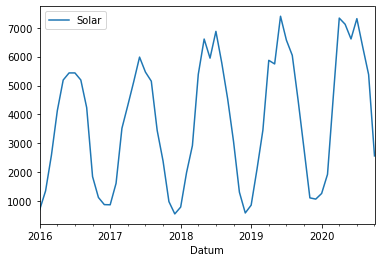

In [41]:
solar.plot()

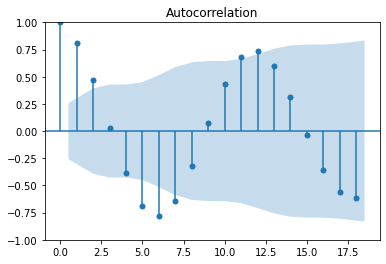

In [42]:
ACF = plot_acf(solar)

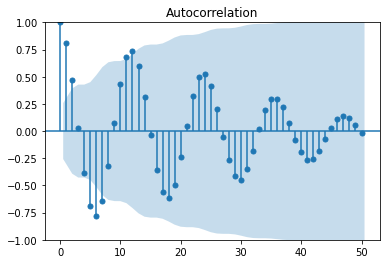

In [43]:
ACF = plot_acf(solar, lags=50)

C:\Users\sinaa\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



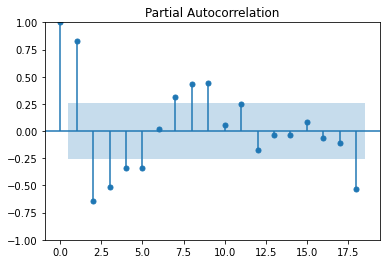

In [44]:
PACF = plot_pacf(solar)

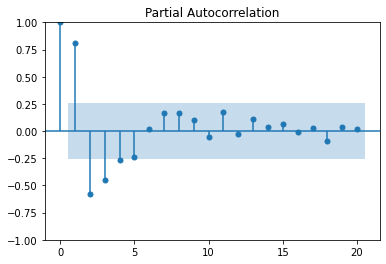

In [45]:
PACF = plot_pacf(solar, method='ywm', lags=20)

<div class="alert alert-info">
- Gehe zurück in dein neues Notebook<br>
- Plotte die ACF deiner geladenen Stromverbrauchsdaten<br>
- Plotte auch die PACF
</div>

<h2>2.3 Komponenten von Zeitreihen (Trend, Saisonalität) berechnen und visualisieren</h2>

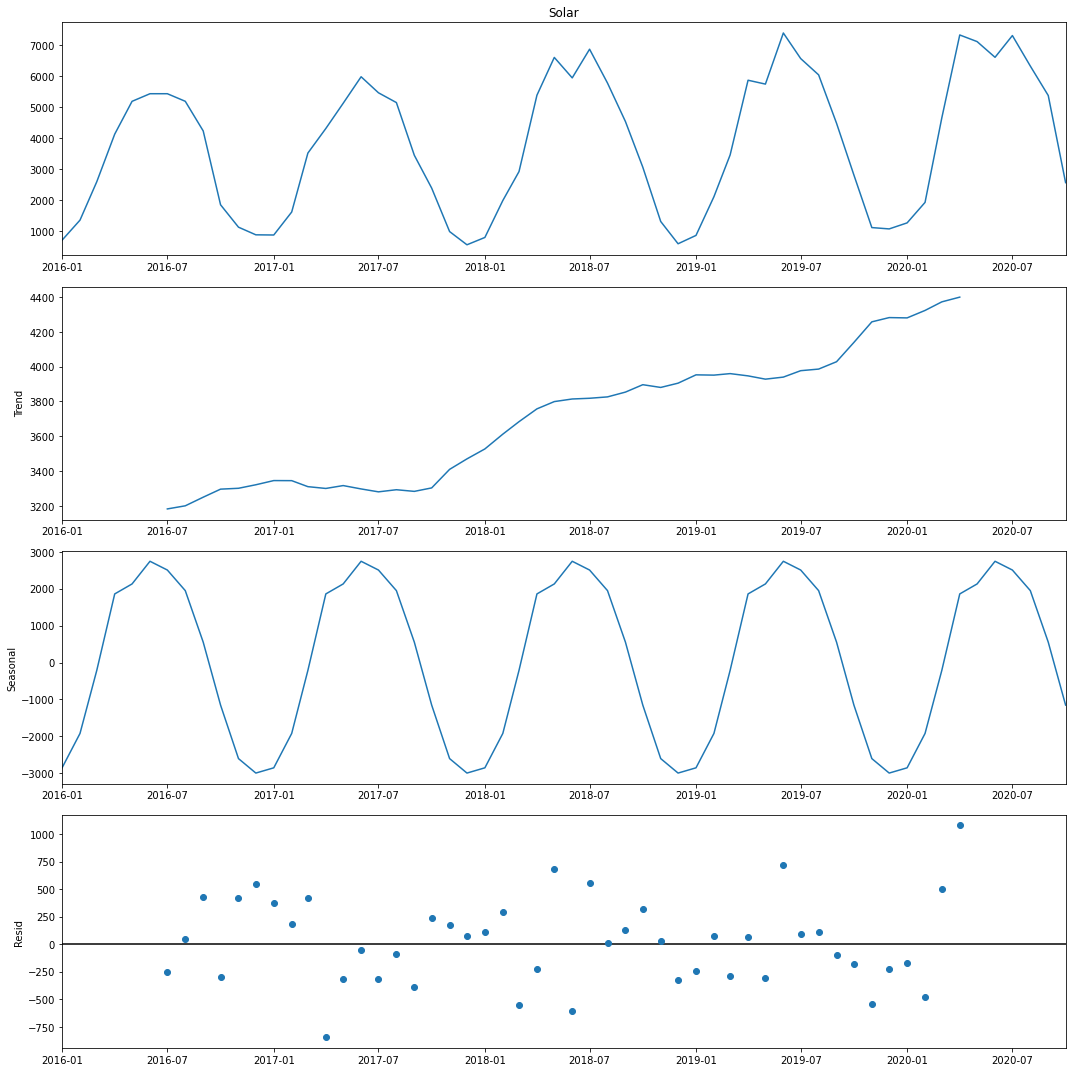

In [46]:
decomp = seasonal_decompose(ene['Solar'], model='additive')
fig = decomp.plot()
fig.set_size_inches((15, 15))
fig.tight_layout()

<div class="alert alert-info">
- Öffne ein neues Notebook (oder gehe in dein Airline-Notebook zurück wenn du nicht noch einmal Dateneinlesen üben magst<br>
- Lade die Airlinedaten<br>
- Plotte auch die Dekomposition der Daten mit 'seasonal_decompose'
</div>